In [3]:
# setup
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

pd.plotting.register_matplotlib_converters()
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.width = None
pd.options.display.max_rows = None
sns.set_style("whitegrid")
    
print("Setup Complete")

Setup Complete


# Taylor Swift Behavourial Analysis based on her Tweets
## This notebook will answer following questions  

1. When does Taylor Swift like to post her status
2. How often does she like to post her status
3. What type of device does she like to post her status with
4. Who's tweets she has replied to

In [4]:
df = pd.read_csv('./taylor_swift_tweets.csv').iloc[:, 1:]  # drop the first column
df.head()

,tweet_id,text,likes,retweets,created_at,source,reply_to_status,reply_to_user,location
0,1346562058653937680,https://t.co/EXNfkj8ny5 https://t.co/lduq7I53eZ,218711,22469,2021-01-05 20:59:47,Twitter for iPhone,NaN,NaN,NaN
1,1344667704372957190,"bye 2020, it’s been weird. https://t.co/vQoZVS...",668065,82117,2020-12-31 15:32:18,Twitter for iPhone,NaN,NaN,NaN
2,1342918732486594560,boxing day 📦 https://t.co/c6XADs4GZe,401245,34085,2020-12-26 19:42:30,Twitter for iPhone,NaN,NaN,NaN
3,1341394572186972160,@katyperry THIS IS GENIUS https://t.co/NshAzSYA71,80532,8412,2020-12-22 14:46:02,Twitter for iPhone,1.341021e+18,katyperry,NaN
4,1341154037572509697,Guys.\nSeriously.\nThank you for doing this. h...,321809,31083,2020-12-21 22:50:14,Twitter for iPhone,NaN,NaN,NaN


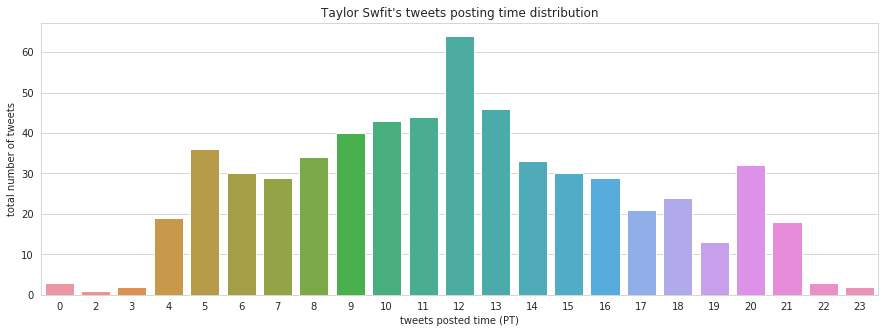

In [5]:
# Question 1: When does Taylor Swift like to post her status
post_time = df['created_at'].str.split(' ')
hour_sr = post_time.str.get(1).str.split(':').str.get(0)  # the hour Taylor Swift post tweets
hour_sr = (hour_sr.astype(int) - 8) % 24  # convert to Pacific time assuming she spends time there the most
result = pd.DataFrame(hour_sr).groupby('created_at').size().reset_index().rename(columns={0: 'size'})

plt.figure(figsize=(15, 5))
sns.barplot(x='created_at', y='size', data=result).set_title('Taylor Swfit\'s tweets posting time distribution')
plt.xlabel('tweets posted time (PT)')
plt.ylabel('total number of tweets')
plt.show()

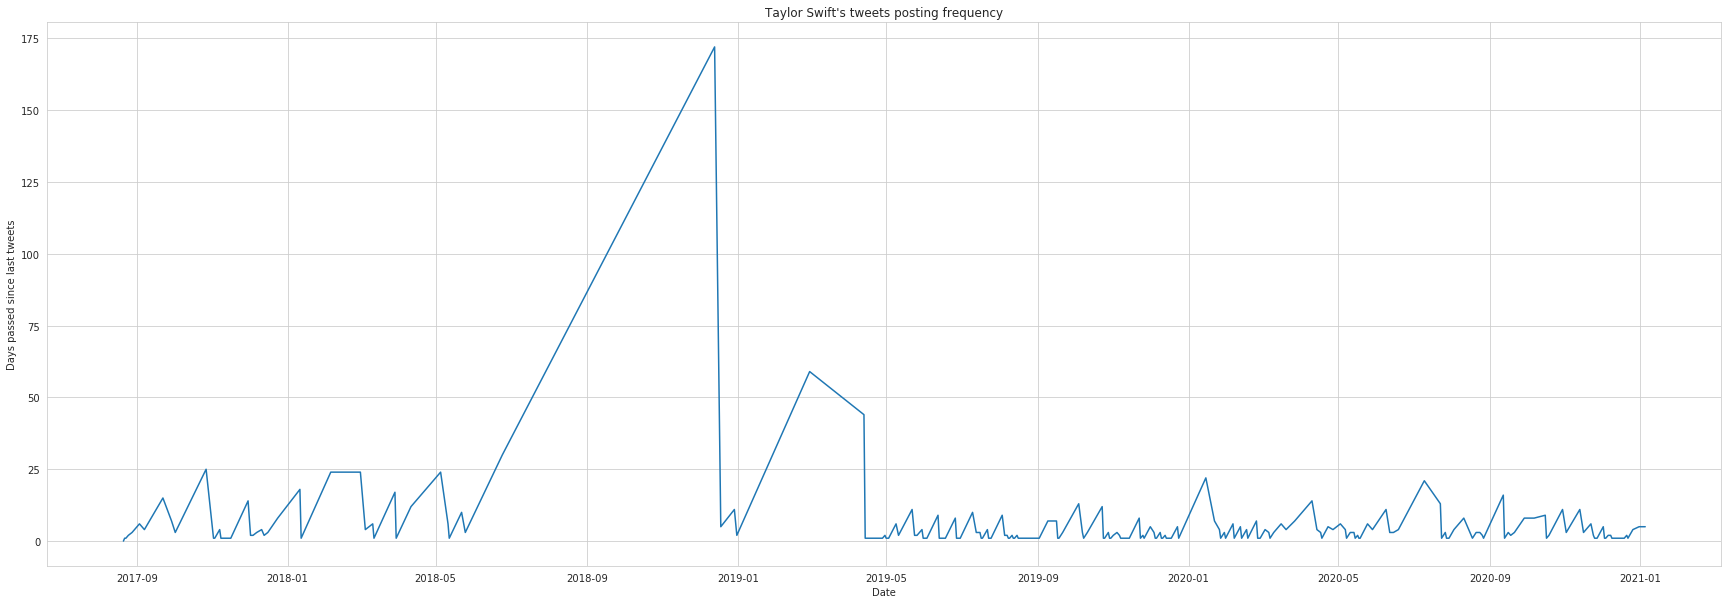

Taylor Swift's overall average posting frequency: 2.07 (days/tweet)
Taylor Swift's 2017/09 - 2019/01 average posting frequency: 4.87 (days/tweet)
Taylor Swift's 2019/01 - 2021/01 average posting frequency: 1.49 (days/tweet)

p.s Taylor Swift's average tweets per day is 0.48 and average twitter users' tweets per day is 4.42
source: https://blog.hubspot.com/blog/tabid/6307/bid/4594/is-22-tweets-per-day-the-optimum.aspx#:~:text=The%20average%20tweets%20per%20day,number%20of%20tweets%20per%20day.


In [7]:
# Question 2: How often does she like to post her status
date_sr = post_time.str.get(0)  # the dates Taylor Swift posts tweets
date_df = pd.DataFrame(date_sr).groupby('created_at').size().reset_index().rename(
            columns={0:'number_of_tweets_posted'})

date_df['created_at_datetype'] = pd.to_datetime(date_df['created_at'], format='%Y-%m-%d')  # convert created_at to date object to perform arithmetics
date_df['days_since_last_tweet'] = [(date_df['created_at_datetype'][i] - date_df['created_at_datetype'][i-1]).days                       
    if i >=1 else 0 for i in range(len(date_df['created_at']))]

plt.figure(figsize=(30,10))
ax = sns.lineplot(data=date_df, x='created_at_datetype', y='days_since_last_tweet').set_title('Taylor Swift\'s tweets posting frequency')
plt.xlabel('Date')
plt.ylabel('Days passed since last tweets')
plt.show()

print('Taylor Swift\'s overall average posting frequency: {:.2f} (days/tweet)'.format(date_df['days_since_last_tweet'].sum() / date_df['number_of_tweets_posted'].sum()))
print('Taylor Swift\'s 2017/09 - 2019/01 average posting frequency: {:.2f} (days/tweet)'.format(
     date_df[date_df['created_at_datetype'] <= datetime.datetime(2019, 1, 1)]['days_since_last_tweet'].sum() / 
     date_df[date_df['created_at_datetype'] <= datetime.datetime(2019, 1, 1)]['number_of_tweets_posted'].sum()))
print('Taylor Swift\'s 2019/01 - 2021/01 average posting frequency: {:.2f} (days/tweet)\n'.format(
     date_df[date_df['created_at_datetype'] > datetime.datetime(2019, 1, 1)]['days_since_last_tweet'].sum() /
     date_df[date_df['created_at_datetype'] > datetime.datetime(2019, 1, 1)]['number_of_tweets_posted'].sum()))
print('p.s Taylor Swift\'s average tweets per day is {:.2f} and average twitter users\' tweets per day is 4.42\nsource: https://blog.hubspot.com/blog/tabid/6307/bid/4594/is-22-tweets-per-day-the-optimum.aspx#:~:text=The%20average%20tweets%20per%20day,number%20of%20tweets%20per%20day.'.format(
     date_df['number_of_tweets_posted'].sum()/ date_df['days_since_last_tweet'].sum()))

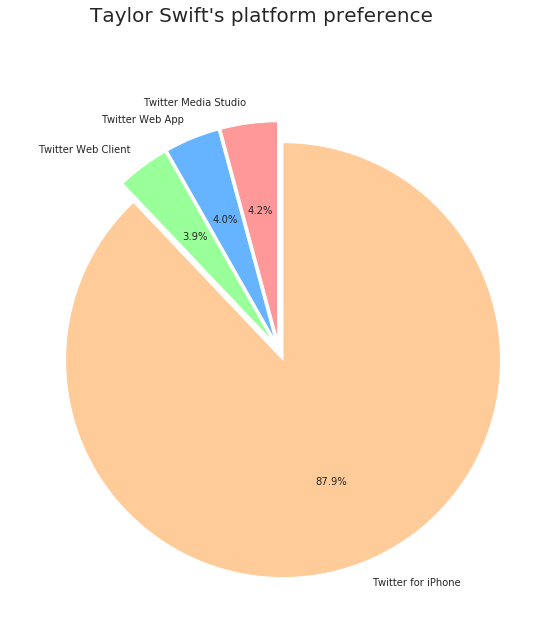

In [8]:
# Question 3: What type of device does she like to post her status with
# Twitter Web App: Tweets from a browser on phones
# Twitter Web Client: Tweets from a browser on dektops/laptops
# Twitter Media Studio: An easy-to-use platform to manage, measure and monetize your media on Twitter

# credits to:https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
source_df = df.groupby('source').size().reset_index().rename(columns={0: 'times'})
fig = plt.figure(figsize=(20,10))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.05,0.05,0.05,0.05)
g = plt.pie(source_df['times'], labels=source_df['source'], colors=colors, explode=explode, startangle=90, autopct='%1.1f%%')
fig.suptitle('Taylor Swift\'s platform preference', fontsize=20)
plt.show()

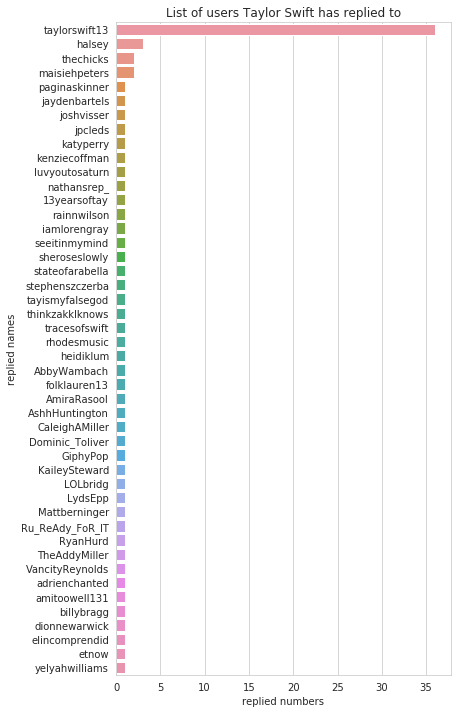

In [10]:
# Question 4: Whose tweets she has replied to

reply_df = df[df['reply_to_user'].notnull()].groupby('reply_to_user').size().reset_index().rename(columns={0:'size'}).sort_values(by='size', ascending=False)
plt.figure(figsize=(6, 12))
g = sns.barplot(data=reply_df, x='size', y='reply_to_user', orient='h').set_title('List of users Taylor Swift has replied to')
plt.xlabel('replied numbers')
plt.ylabel('replied names')

plt.show()